In [1]:
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv("/content/air_quality_dataset.csv")   # change path if needed

print("Dataset info:")
print(data.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB
None


In [2]:
if 'Date' in data.columns:
    data = data.drop(columns=['Date'])
    print("Dropped 'Date' column because it is invalid.")

# Step 3: Numeric columns
num_columns = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3',
               'Temperature', 'Humidity', 'Wind Speed']

# Step 4: Convert to numeric
for column in num_columns:
    if column in data.columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')

Dropped 'Date' column because it is invalid.


In [3]:
# Step 5: Fill missing numeric values with mean
for column in num_columns:
    if column in data.columns:
        data[column] = data[column].fillna(data[column].mean())

# Step 6: Remove duplicates
data = data.drop_duplicates()
print("After removing duplicates:", data.shape)

After removing duplicates: (10000, 11)


In [4]:
# Step 7: Remove negative or invalid numeric values
for column in num_columns:
    if column in data.columns:
        data = data[data[column] >= 0]

# Step 8: Reset index
data = data.reset_index(drop=True)

In [5]:
print("\nCleaned dataset info:")
print(data.info())
print("\nPreview of cleaned data:")
print(data.head())

# Step 9: Save and download cleaned dataset
cleaned_path = "/content/cleaned_air_quality.csv"
data.to_csv(cleaned_path, index=False)

from google.colab import files
files.download(cleaned_path)


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7957 entries, 0 to 7956
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7957 non-null   object 
 1   Country      7957 non-null   object 
 2   PM2.5        7957 non-null   float64
 3   PM10         7957 non-null   float64
 4   NO2          7957 non-null   float64
 5   SO2          7957 non-null   float64
 6   CO           7957 non-null   float64
 7   O3           7957 non-null   float64
 8   Temperature  7957 non-null   float64
 9   Humidity     7957 non-null   float64
 10  Wind Speed   7957 non-null   float64
dtypes: float64(9), object(2)
memory usage: 683.9+ KB
None

Preview of cleaned data:
             City   Country   PM2.5    PM10    NO2    SO2    CO      O3  \
0         Bangkok  Thailand   86.57   25.19  99.88  30.63  4.46   36.29   
1        Istanbul    Turkey   50.63   97.39  48.14   8.71  3.40  144.16   
2  Rio de Jane

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

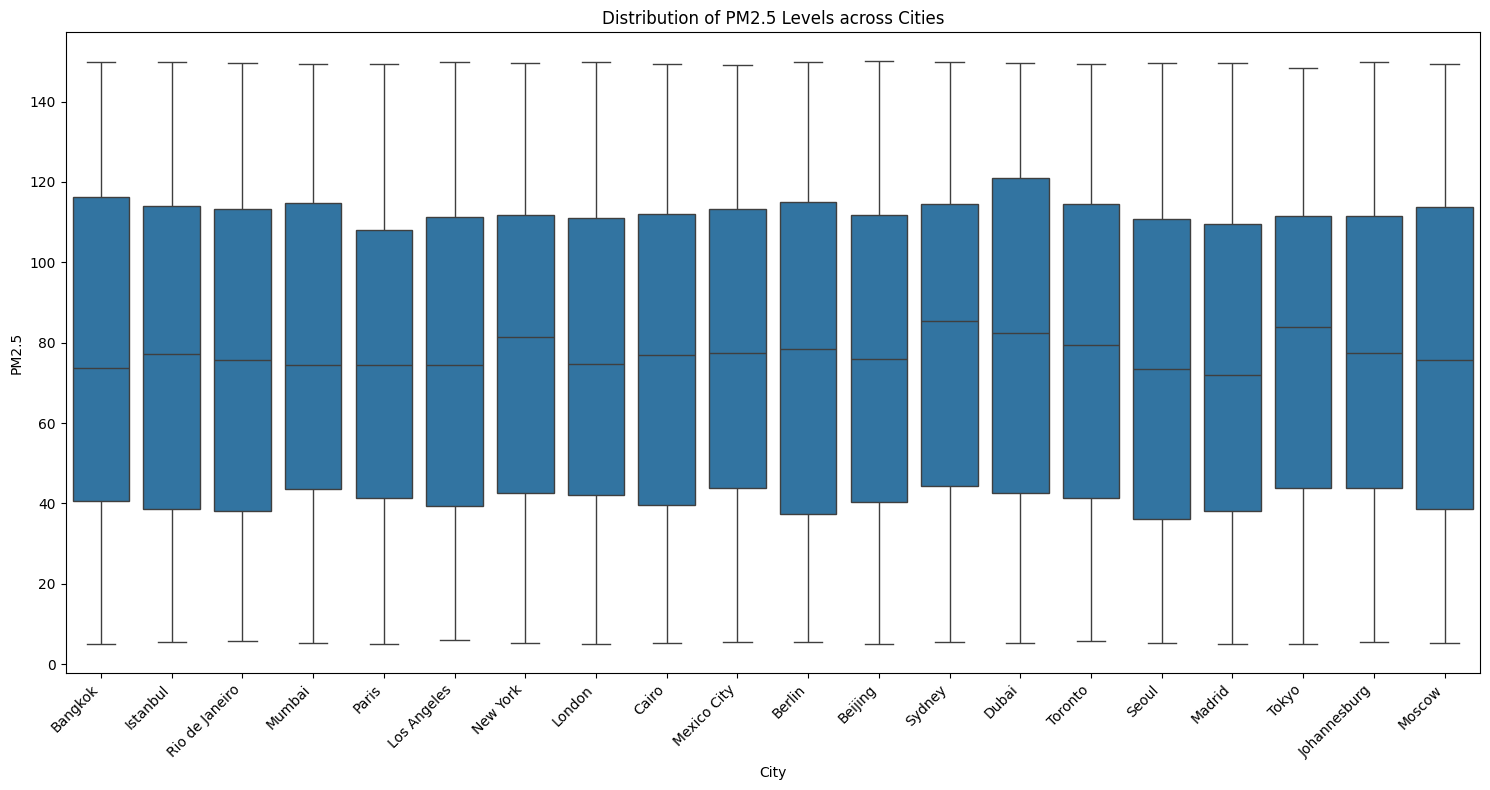

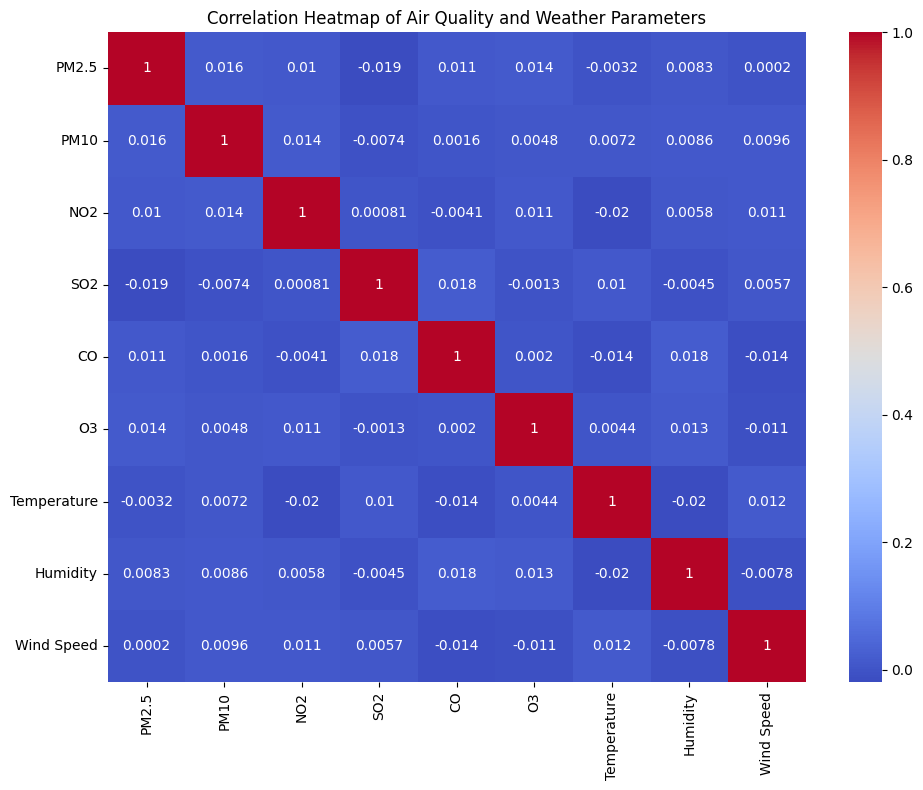

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for PM2.5 distribution across cities
plt.figure(figsize=(15, 8))
sns.boxplot(x='City', y='PM2.5', data=data)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of PM2.5 Levels across Cities')
plt.tight_layout()
plt.show()

# Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
corr = data[num_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Air Quality and Weather Parameters')
plt.tight_layout()
plt.show()
